In [1]:
import pandas as pd

data_file_path = './trip_data/trip_data_1.csv'
fare_file_path = './trip_fare/trip_fare_1.csv'

trip_data = pd.read_csv(data_file_path)
trip_fare = pd.read_csv(fare_file_path)

In [2]:
print(len(trip_data))
print(trip_data.head())

14776615
                          medallion                      hack_license   
0  89D227B655E5C82AECF13C3F540D4CF4  BA96DE419E711691B9445D6A6307C170  \
1  0BD7C8F5BA12B88E0B67BED28BEA73D8  9FD8F69F0804BDB5549F40E9DA1BE472   
2  0BD7C8F5BA12B88E0B67BED28BEA73D8  9FD8F69F0804BDB5549F40E9DA1BE472   
3  DFD2202EE08F7A8DC9A57B02ACB81FE2  51EE87E3205C985EF8431D850C786310   
4  DFD2202EE08F7A8DC9A57B02ACB81FE2  51EE87E3205C985EF8431D850C786310   

  vendor_id  rate_code store_and_fwd_flag      pickup_datetime   
0       CMT          1                  N  2013-01-01 15:11:48  \
1       CMT          1                  N  2013-01-06 00:18:35   
2       CMT          1                  N  2013-01-05 18:49:41   
3       CMT          1                  N  2013-01-07 23:54:15   
4       CMT          1                  N  2013-01-07 23:25:03   

      dropoff_datetime  passenger_count  trip_time_in_secs  trip_distance   
0  2013-01-01 15:18:10                4                382            1.0  \
1

In [2]:
print(len(trip_fare))
print(trip_fare.head())

14776615
                          medallion                      hack_license   
0  89D227B655E5C82AECF13C3F540D4CF4  BA96DE419E711691B9445D6A6307C170  \
1  0BD7C8F5BA12B88E0B67BED28BEA73D8  9FD8F69F0804BDB5549F40E9DA1BE472   
2  0BD7C8F5BA12B88E0B67BED28BEA73D8  9FD8F69F0804BDB5549F40E9DA1BE472   
3  DFD2202EE08F7A8DC9A57B02ACB81FE2  51EE87E3205C985EF8431D850C786310   
4  DFD2202EE08F7A8DC9A57B02ACB81FE2  51EE87E3205C985EF8431D850C786310   

   vendor_id      pickup_datetime  payment_type   fare_amount   surcharge   
0        CMT  2013-01-01 15:11:48           CSH           6.5         0.0  \
1        CMT  2013-01-06 00:18:35           CSH           6.0         0.5   
2        CMT  2013-01-05 18:49:41           CSH           5.5         1.0   
3        CMT  2013-01-07 23:54:15           CSH           5.0         0.5   
4        CMT  2013-01-07 23:25:03           CSH           9.5         0.5   

    mta_tax   tip_amount   tolls_amount   total_amount  
0       0.5          0.0        

In [3]:
# Slicing the first half of each DataFrame
half_trip_data = trip_data.iloc[:1000]
half_trip_fare = trip_fare.iloc[:1000]


In [4]:
half_trip_fare.columns = half_trip_fare.columns.str.strip()

In [5]:
# Merge DataFrames based on common columns
full_trip_data_half = pd.merge(half_trip_data, half_trip_fare, on=['medallion', 'hack_license', 'vendor_id', 'pickup_datetime'])

# Filter out unrealistic coordinates
full_trip_data_half = full_trip_data_half[
    (full_trip_data_half['pickup_longitude'].between(-74.25559, -73.90001)) &
    (full_trip_data_half['pickup_latitude'].between(40.59612, 40.81553)) &
    (full_trip_data_half['dropoff_longitude'].between(-74.25559, -73.90001)) &
    (full_trip_data_half['dropoff_latitude'].between(40.59612, 40.81553))
]

# Remove extreme outliers for rate_code and passenger_count
full_trip_data_half = full_trip_data_half[
    (full_trip_data_half['rate_code'].between(1, 6)) &
    (full_trip_data_half['passenger_count'].between(1, 6))
]

# Remove trips with zero time or distance
full_trip_data_half = full_trip_data_half[
    (full_trip_data_half['trip_time_in_secs'] > 0) &
    (full_trip_data_half['trip_distance'] > 0)
]

# Cap extreme fare amounts and total amounts
full_trip_data_half['fare_amount'] = full_trip_data_half['fare_amount'].clip(upper=500)
full_trip_data_half['total_amount'] = full_trip_data_half['total_amount'].clip(upper=650)

# Optionally, you may also want to cap tips and tolls to avoid extremely high values
full_trip_data_half['tip_amount'] = full_trip_data_half['tip_amount'].clip(upper=200)
full_trip_data_half['tolls_amount'] = full_trip_data_half['tolls_amount'].clip(upper=20)


# Optionally, verify the first few rows of the merged DataFrame
print(full_trip_data_half.head())


                          medallion                      hack_license   
0  89D227B655E5C82AECF13C3F540D4CF4  BA96DE419E711691B9445D6A6307C170  \
1  0BD7C8F5BA12B88E0B67BED28BEA73D8  9FD8F69F0804BDB5549F40E9DA1BE472   
2  0BD7C8F5BA12B88E0B67BED28BEA73D8  9FD8F69F0804BDB5549F40E9DA1BE472   
3  DFD2202EE08F7A8DC9A57B02ACB81FE2  51EE87E3205C985EF8431D850C786310   
4  DFD2202EE08F7A8DC9A57B02ACB81FE2  51EE87E3205C985EF8431D850C786310   

  vendor_id  rate_code store_and_fwd_flag      pickup_datetime   
0       CMT          1                  N  2013-01-01 15:11:48  \
1       CMT          1                  N  2013-01-06 00:18:35   
2       CMT          1                  N  2013-01-05 18:49:41   
3       CMT          1                  N  2013-01-07 23:54:15   
4       CMT          1                  N  2013-01-07 23:25:03   

      dropoff_datetime  passenger_count  trip_time_in_secs  trip_distance   
0  2013-01-01 15:18:10                4                382            1.0  \
1  2013-01

In [6]:
# Save to CSV if needed
full_trip_data_half.to_csv('./merged_trip_1_data_1000.csv', index=False)

# Perform any analysis or processing
print(full_trip_data_half.describe())


        rate_code  passenger_count  trip_time_in_secs  trip_distance   
count  879.000000       879.000000         879.000000     879.000000  \
mean     1.017065         2.017065         574.171786       2.530091   
std      0.220643         1.674798         368.204343       2.131580   
min      1.000000         1.000000          60.000000       0.020000   
25%      1.000000         1.000000         300.000000       1.100000   
50%      1.000000         1.000000         480.000000       1.870000   
75%      1.000000         2.000000         780.000000       3.300000   
max      5.000000         6.000000        2640.000000      16.960000   

       pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude   
count        879.000000       879.000000         879.000000        879.000000  \
mean         -73.981255        40.749709         -73.977234         40.749350   
std            0.018470         0.024777           0.023395          0.031263   
min          -74.016403    

In [7]:
import numpy as np

full_trip_data_half['pickup_datetime'] = pd.to_datetime(full_trip_data_half['pickup_datetime'])
full_trip_data_half['dropoff_datetime'] = pd.to_datetime(full_trip_data_half['dropoff_datetime'])

# Extracting features for the state space
full_trip_data_half['hour_of_day'] = full_trip_data_half['pickup_datetime'].dt.hour
full_trip_data_half['day_of_week'] = full_trip_data_half['pickup_datetime'].dt.dayofweek


In [8]:
from sklearn.cluster import KMeans

# Get the pickup coordinates
pickup_points = full_trip_data_half[['pickup_latitude', 'pickup_longitude']].values
dropoff_points = full_trip_data_half[['dropoff_latitude', 'dropoff_longitude']].values

# Fit a KMeans model to the coordinates to define zones
kmeans = KMeans(n_clusters=5).fit(pickup_points)
full_trip_data_half['pickup_zone'] = kmeans.predict(pickup_points)
full_trip_data_half['dropoff_zone'] = kmeans.predict(dropoff_points)

# Assume the driver starts each trip in the dropoff zone of the previous trip
full_trip_data_half['current_zone'] = full_trip_data_half['dropoff_zone'].shift(1).fillna(0).astype(int)

# Check if the driver is at the pickup location
full_trip_data_half['is_at_pickup'] = (full_trip_data_half['current_zone'] == full_trip_data_half['pickup_zone']).astype(int)


/home/ozzie/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [9]:
full_trip_data_half.head()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,...,mta_tax,tip_amount,tolls_amount,total_amount,hour_of_day,day_of_week,pickup_zone,dropoff_zone,current_zone,is_at_pickup
0,89D227B655E5C82AECF13C3F540D4CF4,BA96DE419E711691B9445D6A6307C170,CMT,1,N,2013-01-01 15:11:48,2013-01-01 15:18:10,4,382,1.0,...,0.5,0.0,0.0,7.0,15,1,4,4,0,0
1,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,1,N,2013-01-06 00:18:35,2013-01-06 00:22:54,1,259,1.5,...,0.5,0.0,0.0,7.0,0,6,0,4,4,0
2,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,1,N,2013-01-05 18:49:41,2013-01-05 18:54:23,1,282,1.1,...,0.5,0.0,0.0,7.0,18,5,0,0,4,0
3,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,1,N,2013-01-07 23:54:15,2013-01-07 23:58:20,2,244,0.7,...,0.5,0.0,0.0,6.0,23,0,4,4,0,0
4,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,1,N,2013-01-07 23:25:03,2013-01-07 23:34:24,1,560,2.1,...,0.5,0.0,0.0,10.5,23,0,4,0,4,1


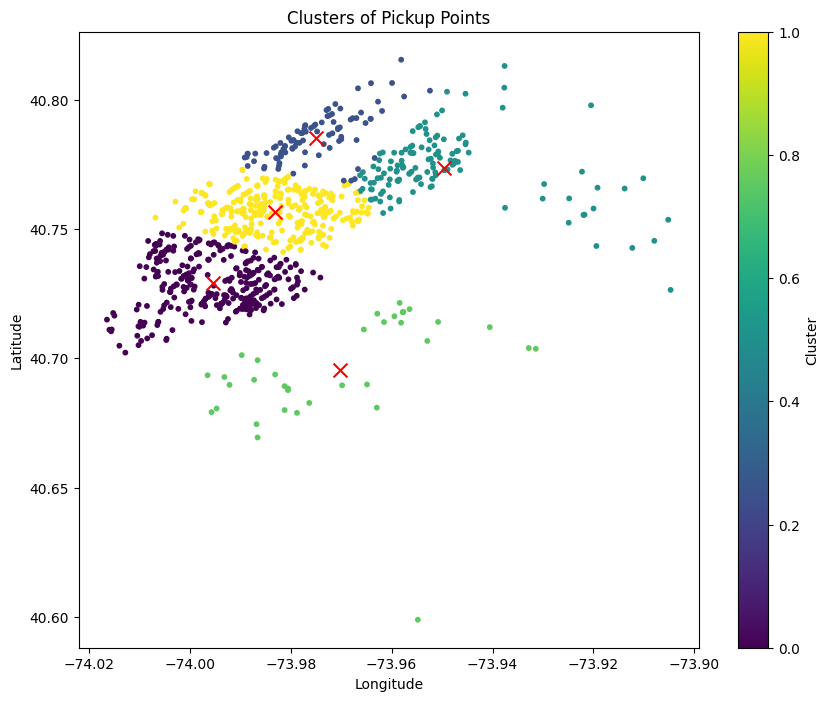

In [10]:
import matplotlib.pyplot as plt

# Get cluster centers
cluster_centers = kmeans.cluster_centers_

# Get cluster labels
cluster_labels = kmeans.labels_

# Plot the pickup points with cluster assignments
plt.figure(figsize=(10, 8))
plt.scatter(pickup_points[:, 1], pickup_points[:, 0], c=cluster_labels, cmap='viridis', s=10)
plt.scatter(cluster_centers[:, 1], cluster_centers[:, 0], c='red', marker='x', s=100)  # Plot cluster centers
plt.title('Clusters of Pickup Points')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster')
plt.show()

In [11]:
# Initialize Q-table
num_zones = full_trip_data_half['pickup_zone'].nunique()
num_states = num_zones * 24 # Assuming 24 hours in a day
num_actions = 3  # Refuse, accept without moving, accept and move
Q = np.zeros((num_states, num_actions))

# Define the state index calculation
def get_state_index(row):
    return (row['pickup_zone'] * 24 + row['hour_of_day']) 

# Learning parameters
alpha = 0.1  # learning rate
gamma = 0.9  # discount factor
epsilon_max = 1.0
epsilon_min = 0.01
epsilon_decay = 0.995
epsilon = epsilon_max

In [12]:
print(num_actions)
print(num_states)
print(num_zones)

3
120
5


In [13]:
import numpy as np

def haversine_distance(lat1, lon1, lat2, lon2):
    # Radius of the Earth in kilometers
    R = 6371.0
    # Conversions to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    # Differences
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    # Haversine formula
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c
    return distance

def calculate_reward(trip_row, action, next_trip_row):
    if action == 1:  # Refuse ride
        return -0.5  # A small penalty for not taking the fare
    else:
        fare = trip_row['total_amount']
        cost_per_km = 0.5
        cost_per_minute = 0.1
        if action == 3:  # Drive to pickup
            # Calculate distance to next pickup
            additional_distance = haversine_distance(trip_row['dropoff_latitude'], trip_row['dropoff_longitude'],
                                                     next_trip_row['pickup_latitude'], next_trip_row['pickup_longitude'])
            # Assume an average speed of 30 km/h to calculate time in hours
            average_speed_kmh = 30
            additional_time = additional_distance / average_speed_kmh * 60  # in minutes
            travel_cost = (trip_row['trip_distance'] + additional_distance) * cost_per_km
            time_cost = ((trip_row['trip_time_in_secs'] / 60) + additional_time) * cost_per_minute
        else:  # Already at pickup
            travel_cost = trip_row['trip_distance'] * cost_per_km
            time_cost = (trip_row['trip_time_in_secs'] / 60) * cost_per_minute
        
        reward = fare - (travel_cost + time_cost)
        return reward


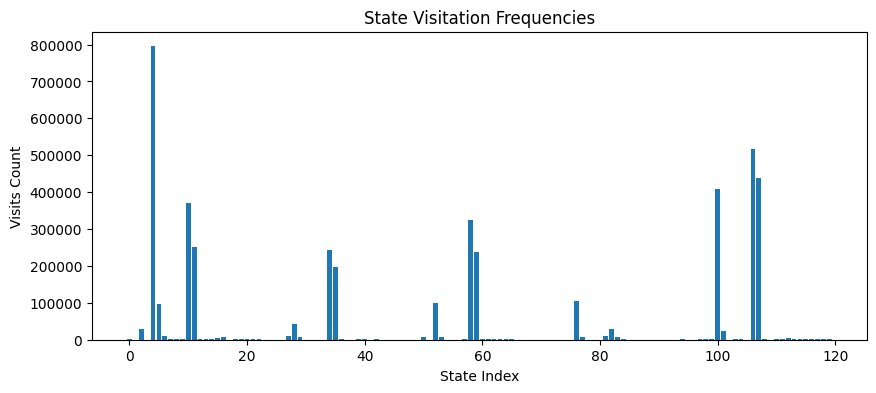

In [15]:
import matplotlib.pyplot as plt

num_episodes = 10000
state_visits = np.zeros(num_states)

# SARSA Training Loop
for episode in range(num_episodes):
    current_index = np.random.randint(len(full_trip_data_half))
    current = full_trip_data_half.iloc[current_index]
    state = get_state_index(current)
    action_index = np.random.choice(num_actions) if np.random.random() < epsilon else np.argmax(Q[state])

    while True:
        next_index = (current_index + 1) % len(full_trip_data_half)
        next_row = full_trip_data_half.iloc[next_index]
        next_state = get_state_index(next_row)

        # Calculate reward
        reward = calculate_reward(current, action_index, next_row)

        # Choose the next action using epsilon-greedy strategy
        next_action_index = np.random.choice(num_actions) if np.random.random() < epsilon else np.argmax(Q[next_state])

        state_visits[state] += 1

        # SARSA update
        Q[state, action_index] += alpha * (reward + gamma * Q[next_state, next_action_index] - Q[state, action_index])

        # Move to the next state and action
        state, action_index = next_state, next_action_index
        current, current_index = next_row, next_index

        # Break if end of dataset
        if current_index == 0:
            break

    # Decay epsilon, but reset it periodically
    if episode % 1000 == 0:  # Reset epsilon every 1000 episodes
        epsilon = epsilon_max
    else:
        epsilon = max(epsilon_min, epsilon * epsilon_decay)


plt.figure(figsize=(10, 4))
plt.bar(range(num_states), state_visits)
plt.title('State Visitation Frequencies')
plt.xlabel('State Index')
plt.ylabel('Visits Count')
plt.show()

In [16]:
# Display a snippet of the Q-table
print(Q[10:, :]) # Print out ten state's Q-values

# Define a mapping from action indices to descriptions
action_descriptions = {0: "refuse", 1: "accept without moving", 2: "accept and move"}

# Find the best actions for a few states
for i in range(10):
    best_action_index = np.argmax(Q[i])
    print(f"Best action for state {i} is to {action_descriptions[best_action_index]}")

[[ 90.48461145  82.61095215  92.32005251]
 [ 87.31405442  80.74347943  90.39275552]
 [ 85.12598933  72.04492213  77.7327272 ]
 [ 75.2749593   70.76020259  81.65433027]
 [ 77.88522687  68.94977906  84.33054499]
 [ 79.67271364  69.26632694  87.80842947]
 [ 88.58923853  84.33720582  96.39277464]
 [  0.           0.           0.        ]
 [ 78.98121801  76.65774507  91.79418806]
 [ 87.95606864  71.33802407  80.60996003]
 [ 79.64999432  75.42837895  87.50221051]
 [ 75.00409504  66.77103344  79.70328276]
 [ 83.17183407  67.76014825  75.95454781]
 [  0.           0.           0.        ]
 [  0.           0.           0.        ]
 [  0.           0.           0.        ]
 [  0.           0.           0.        ]
 [140.59565587  87.65051413 135.94153873]
 [105.86759399  93.74671151 103.12850431]
 [ 93.26249698  84.81595679  99.12752243]
 [  0.           0.           0.        ]
 [ 83.97424532  43.16599957  26.10176599]
 [  0.           0.           0.        ]
 [  0.           0.           0.  

Are there any non-zero values in the Q-table? True
Number of non-zero entries in the Q-table: 243
Indices of non-zero entries in the Q-table: (array([  0,   0,   0,   2,   2,   2,   4,   4,   4,   5,   5,   5,   6,
         6,   6,   7,   7,   7,   8,   8,   8,   9,   9,   9,  10,  10,
        10,  11,  11,  11,  12,  12,  12,  13,  13,  13,  14,  14,  14,
        15,  15,  15,  16,  16,  16,  18,  18,  18,  19,  19,  19,  20,
        20,  20,  21,  21,  21,  22,  22,  22,  27,  27,  27,  28,  28,
        28,  29,  29,  29,  31,  31,  31,  34,  34,  34,  35,  35,  35,
        36,  36,  36,  37,  37,  37,  39,  39,  39,  40,  40,  40,  41,
        41,  41,  42,  42,  42,  46,  46,  46,  49,  49,  49,  50,  50,
        50,  52,  52,  52,  53,  53,  53,  54,  54,  54,  57,  57,  57,
        58,  58,  58,  59,  59,  59,  60,  60,  60,  61,  61,  61,  62,
        62,  62,  63,  63,  63,  64,  64,  64,  65,  65,  65,  66,  66,
        66,  69,  69,  69,  75,  75,  75,  76,  76,  76,  77,  77

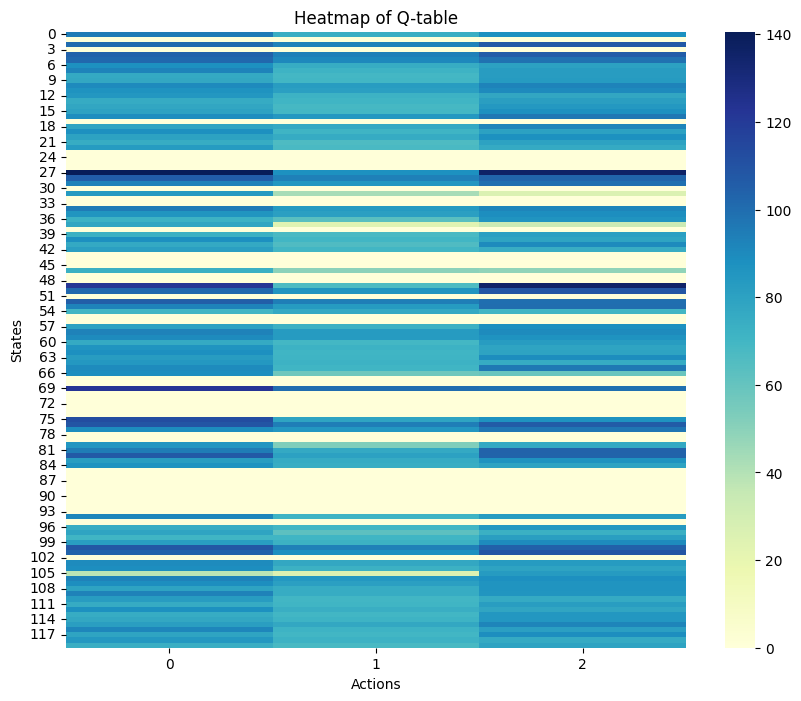

In [17]:
import numpy as np

# Check if there are any non-zero values in the Q-table
non_zero_exists = np.any(Q != 0)
print("Are there any non-zero values in the Q-table?", non_zero_exists)

# Count non-zero entries
non_zero_count = np.count_nonzero(Q)
print("Number of non-zero entries in the Q-table:", non_zero_count)

# Find indices of non-zero entries
non_zero_indices = np.nonzero(Q)
print("Indices of non-zero entries in the Q-table:", non_zero_indices)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(Q, annot=False, cmap="YlGnBu")
plt.title('Heatmap of Q-table')
plt.xlabel('Actions')
plt.ylabel('States')
plt.show()

In [18]:
import pandas as pd

# Extract non-zero Q-values and their indices
non_zero_values = Q[Q != 0]
states, actions = np.nonzero(Q)

# Create a DataFrame for analysis
non_zero_df = pd.DataFrame({
    'State': states,
    'Action': actions,
    'Q-Value': non_zero_values
})

# Save to CSV
non_zero_df.to_csv('non_zero_q_values.csv', index=False)
print("Non-zero Q-values saved to 'non_zero_q_values.csv'.")

# Using the non_zero_df DataFrame from the previous example
print(non_zero_df.describe())


Non-zero Q-values saved to 'non_zero_q_values.csv'.
            State      Action     Q-Value
count  243.000000  243.000000  243.000000
mean    59.864198    1.000000   82.725838
std     37.616844    0.818182   15.481602
min      0.000000    0.000000   24.056662
25%     27.000000    0.000000   74.562556
50%     59.000000    1.000000   82.616844
75%     98.000000    2.000000   89.939371
max    119.000000    2.000000  140.595656


In [19]:
# Evaluation of policy
total_reward = 0
num_trips = len(full_trip_data_half) - 1
for index in range(num_trips):
    current_row = full_trip_data_half.iloc[index]
    next_row = full_trip_data_half.iloc[index + 1] 
    state = get_state_index(current_row)
    action_index = np.random.choice(num_actions) if np.random.random() < epsilon else np.argmax(Q[state])
    reward = calculate_reward(current_row, action_index, next_row)  # Now includes next_row
    total_reward += reward

print(f"Total evaluated reward: {total_reward}")


Total evaluated reward: 8570.735


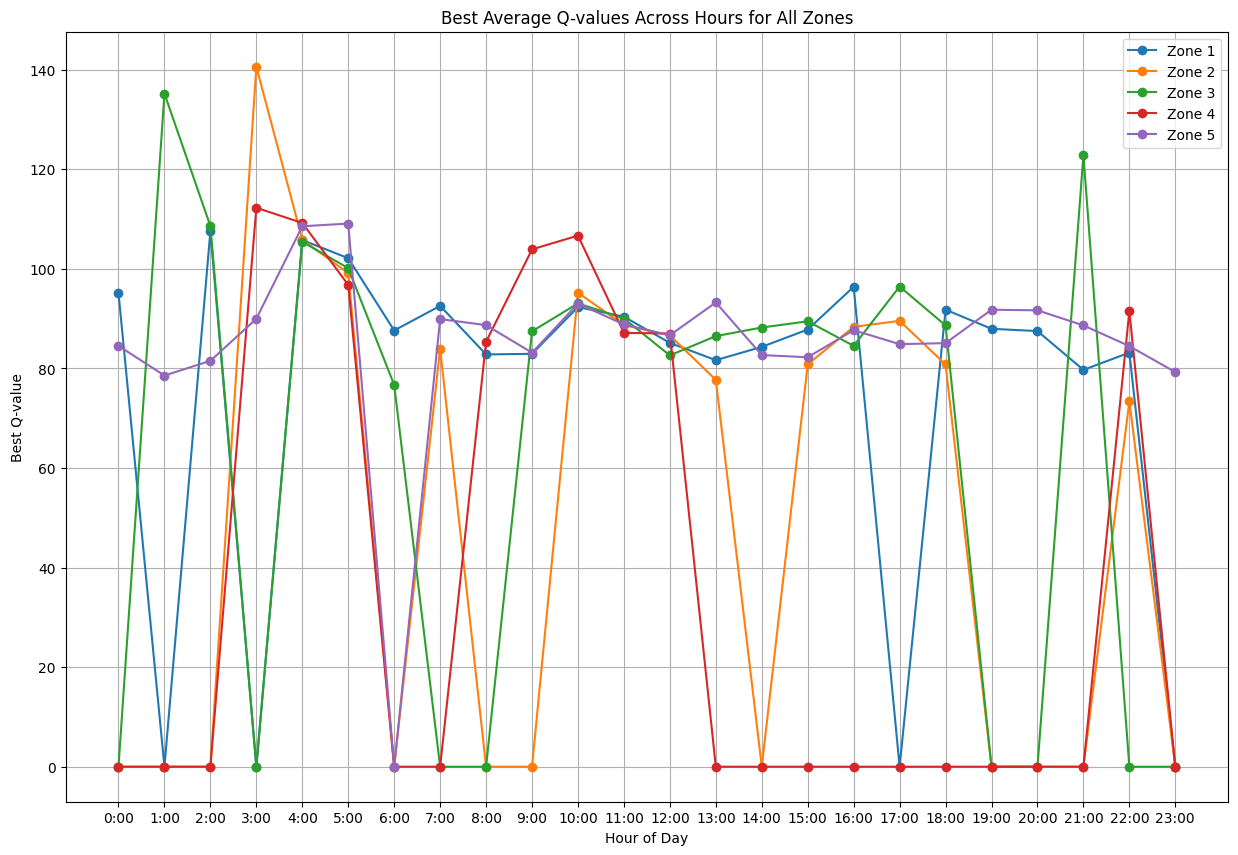

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_zones = 5
hours_per_day = 24

# Initialize array to store the best Q-value for each hour for each zone
best_q_values_per_zone = np.zeros((num_zones, hours_per_day))

# Extract the best Q-values for each hour for each zone
for zone_id in range(num_zones):
    for hour in range(hours_per_day):
        # Calculate the state index for the current hour and zone
        state_index = zone_id * hours_per_day + hour
        # Find the Q-values for this state across all actions
        state_q_values = Q[state_index, :]
        # Find the best Q-value for this state
        best_hourly_q = np.max(state_q_values)
        
        # Store the best Q-value for this hour and zone
        best_q_values_per_zone[zone_id, hour] = best_hourly_q

# Plotting
plt.figure(figsize=(15, 10))
for zone_id in range(num_zones):
    plt.plot(best_q_values_per_zone[zone_id], marker='o', linestyle='-', label=f'Zone {zone_id+1}')
plt.title('Best Average Q-values Across Hours for All Zones')
plt.xlabel('Hour of Day')
plt.ylabel('Best Q-value')
plt.grid(True)
plt.xticks(range(hours_per_day), labels=[f"{h}:00" for h in range(hours_per_day)])
plt.legend()
plt.show()


In [21]:
np.save('learned_q_table.npy', Q)